In [1]:
import numpy as np
import matplotlib.pyplot as plt
from groupy import *

In [38]:
d  = 2

# cluster generation parameters
n1 = 9
n2 = 6
n3 = 5

u1 = np.array([0,1]).reshape(-1,1)
u2 = np.array([1,0]).reshape(-1,1)
u3 = np.array([1,1]).reshape(-1,1)
s1 = .3
s2 = .3
s3 = .2
X  = np.hstack([np.random.normal(loc = u1, scale=s1, size = [d,n1]),
                np.random.normal(loc = u2, scale=s2, size = [d,n2]),
                np.random.normal(loc = u3, scale=s3, size = [d,n3])])

truth = np.hstack([u1,u2,u3])
# generate some noisy initial guess
start = truth + np.random.normal(size = (d,3), scale = s3)
labels = np.hstack([np.zeros(n1, dtype='int'), np.ones(n2, dtype='int'), 2*np.ones(n3, dtype='int')])

def pmId_Frechet_SDP(X):
    Z = GW_SDP(X)
    evals, evecs = np.linalg.eig(Z)
    eps_sdp = np.sign(evecs[:,0])

    # apply optimal g_i to x_i
    Ysdp = eps_sdp*X
    usdp = np.mean(Ysdp, axis=1)
    
    return usdp

def pmId_Frechet_Spectral(X):
    # round top eigenvector of Gram matrix
    eps = np.sign(np.linalg.eigh(X.T @ X)[1][:,-1])

    # apply optimal g_i to x_i
    Yspec = eps*X
    uspec = np.mean(Yspec, axis= 1)
    return uspec

G = CustomFrechet_GroupAction(pmId, d, pmId_Frechet_SDP)
Y = G.randomize_reps(X)

# Generated Data

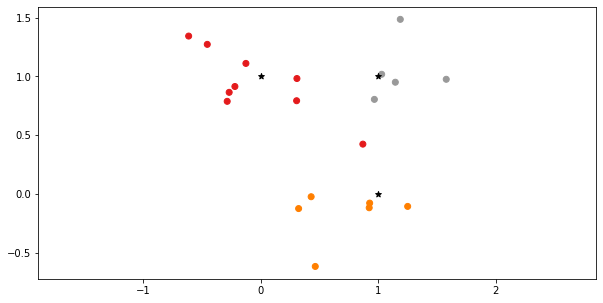

In [39]:
C, classes = G.kmeans_sdp(X, 3, 'iterative')

fig = plt.figure(figsize = (10,5))
plt.axis('equal')
plt.scatter(X[0,:], X[1,:], c = labels, cmap = 'Set1')
plt.scatter(truth[1,:], truth[0,:], c = 'black', marker='*')
plt.show()

# Generated Data with Scrambed Group Representation (Input Data to kMeans)

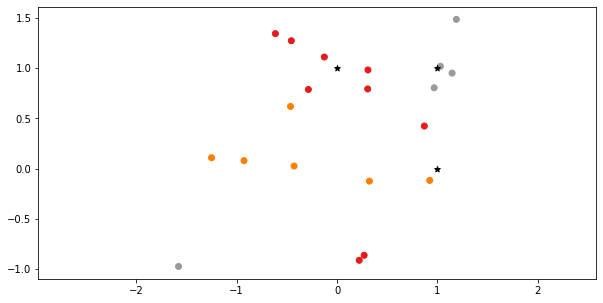

In [40]:
C, classes = G.kmeans_sdp(X, 3, 'iterative')

fig = plt.figure(figsize = (10,5))
plt.axis('equal')
plt.scatter(Y[0,:], Y[1,:], c = labels, cmap = 'Set1')
plt.scatter(truth[1,:], truth[0,:], c = 'black', marker='*')
plt.show()

# kMeans SDP with Quotient Distance

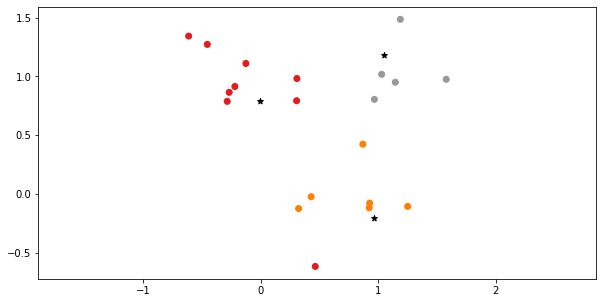

In [41]:
C, classes = G.kmeans_sdp(X, 3)

fig = plt.figure(figsize = (10,5))
plt.axis('equal')
plt.scatter(X[0,:], X[1,:], c = classes, cmap='Set1')
plt.scatter(C[1,:], C[0,:], color = 'black', marker='*')
plt.show()

# Lloyds exact Frechet Mean Computation

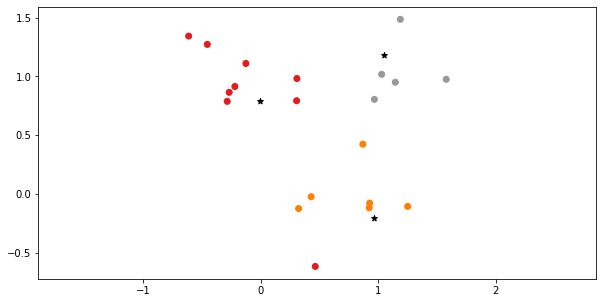

In [42]:
C, classes = G.kmeans(X, 3, init=truth, solver = 'exact')


fig = plt.figure(figsize = (10,5))
plt.axis('equal')

plt.scatter(X[0,:], X[1,:], c = classes, cmap= 'Set1')
plt.scatter(C[1,:], C[0,:], color = 'black', marker='*')
plt.show()

# Lloyds with Gradient Descent

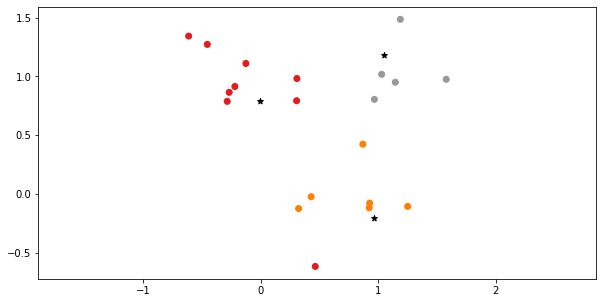

In [43]:
C, classes = G.kmeans(X, 3, init=truth, solver = 'exact')


fig = plt.figure(figsize = (10,5))
plt.axis('equal')
plt.scatter(X[0,:], X[1,:], c = classes, cmap= 'Set1')
plt.scatter(C[1,:], C[0,:], color = 'black', marker='*')
plt.show()

# Lloyds with SDP for +-Id

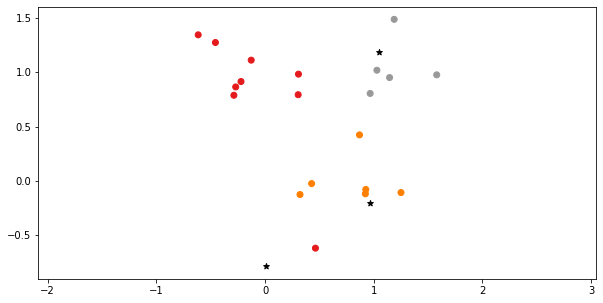

In [44]:
C, classes = G.kmeans(X, 3, init=truth, solver = 'custom')

fig = plt.figure(figsize = (10,5))
plt.axis('equal')
plt.scatter(X[0,:], X[1,:], c = classes, cmap='Set1')
plt.scatter(C[1,:], C[0,:], color = 'black', marker='*')
plt.show()

# Lloyds with Spectral Relaxation for +-Id

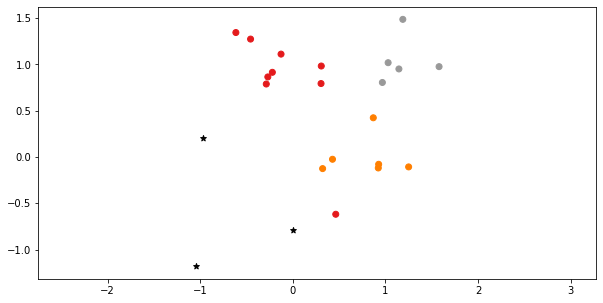

In [45]:
G2 = CustomFrechet_GroupAction(pmId, d, pmId_Frechet_Spectral)
C, classes = G2.kmeans(X, 3, init=truth, solver = 'custom')

fig = plt.figure(figsize = (10,5))
plt.axis('equal')
plt.scatter(X[0,:], X[1,:], c = classes, cmap='Set1')
plt.scatter(C[1,:], C[0,:], color = 'black', marker='*')
plt.show()